# Stage4

Stage4 단계에서는 '이상치 탐지'를 진행하고자 합니다. 앞서 Stage3에서 만든 Isolation forest 모형을 활용해서 anomaly가 있는 데이터들을 추출해줄 수 있습니다.

Anomaly는 일반적인 패턴에서 벗어나는 것을 의미합니다. 데이터 분석에서는 일반적으로 주어진 데이터 집합의 대다수를 따르는 패턴을 찾는 것이 중요합니다. 이러한 패턴을 찾아내면 해당 데이터 집합에서 예측 가능한 결과를 얻을 수 있습니다.

그러나 일부 데이터가 이러한 패턴과 매우 다르게 동작하는 것을 볼 수 있습니다. 이러한 데이터를 이상치(anomaly)라고 하며, 다른 데이터와 매우 다른 특징을 가지고 있습니다. 예를 들어, 특정 집합의 데이터가 대부분 0부터 100까지의 값을 가지는데, 한 개의 데이터 포인트가 1000 이상의 값인 경우, 이는 이상치로 간주됩니다.

이상치는 때로는 데이터 분석에 방해가 되는 경우도 있습니다. 이상치가 있을 경우에는 일반적인 패턴을 찾는 데에 영향을 미칠 수 있기 때문입니다. 그러나 이상치는 때로는 중요한 정보를 제공할 수도 있습니다. 예를 들어, 이상치가 발생하는 원인을 찾아서 시스템을 개선할 수 있습니다. 이상치를 식별하고 이를 분석하는 것은 데이터 분석에서 중요한 과정 중 하나입니다.



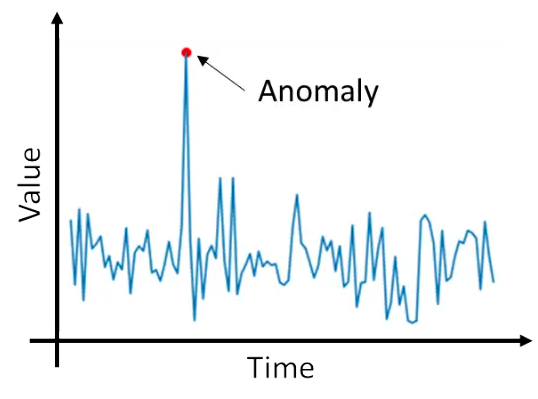

In [ ]:
# decision_function(), predict() 메서드
score=model.decision_function(train_df.to_numpy())
anomaly=model.predict(train_df.to_numpy())
train_df['scores']=score

/home/iai/anaconda3/envs/hjb/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/iai/anaconda3/envs/hjb/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(

위 코드는 Isolation Forest를 이용한 이상치 탐지 모델에서 decision_function() 메서드와 predict() 메서드를 사용하여 train_df 데이터프레임의 이상치를 탐지하고, 이상치 점수를 scores 컬럼에 추가하는 코드입니다.

decision_function() 메서드는 Isolation Forest 모델에서 데이터 포인트의 이상치 점수를 계산합니다. 계산된 이상치 점수는 해당 데이터 포인트가 이상치일 확률을 나타냅니다. 이상치일 가능성이 높을수록 점수가 더 낮아집니다.

predict() 메서드는 decision_function() 메서드에서 계산된 이상치 점수를 바탕으로 데이터 포인트가 이상치인지 여부를 결정합니다. 이상치인 경우 1을, 정상적인 데이터 포인트인 경우 0을 반환합니다.

마지막으로, train_df['scores']=score 코드는 계산된 이상치 점수를 scores 컬럼에 추가합니다. 이렇게 추가된 scores 컬럼을 사용하여 데이터 포인트가 이상치인지 여부를 시각화하거나 추가 분석하는 등의 작업을 수행할 수 있습니다.

In [ ]:
# 데이터 프레임 이상치 탐지
train_df['anomaly']=anomaly

In [ ]:
# anomaly 컬럼에서 1과 0의 개수를 세어 출력
train_df['anomaly'].value_counts()

 1    113721
-1       121
Name: anomaly, dtype: int64

In [ ]:
# anomaly 컬럼이 모든 값을 출력
train_df['anomaly']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V24,V25,V26,V27,V28,V30,scores,anomaly
0,-0.696317,-0.812481,1.178089,0.271798,-0.368309,1.349308,0.652511,0.210988,-1.380804,0.188955,...,0.345210,1.066111,-1.136246,-0.633230,-0.288586,-0.137969,-0.166355,-1.990839,0.193127,1
1,-0.495358,-0.112967,1.191305,-0.608173,-0.007886,0.933476,0.192541,0.320444,-1.264291,-0.056156,...,-0.148280,0.007285,-1.938909,1.241563,-0.460803,0.157587,0.173998,-1.990839,0.222493,1
2,-0.218427,0.580982,0.755819,-0.116154,0.307498,-0.026206,0.390690,0.221649,-0.517216,-0.351540,...,-0.286720,-0.773425,-0.611606,-0.450853,0.220818,0.635984,0.229098,-1.990818,0.240397,1
3,-0.330318,0.858041,0.711241,-0.345477,0.693558,0.317890,0.925884,-3.209968,0.563699,1.161326,...,2.693508,-1.402900,-1.070930,-0.801717,-0.106743,-3.020466,-3.046182,-1.990712,0.208185,1
4,-0.458462,0.172537,-0.082109,-0.189262,1.951788,2.793282,0.302611,0.719980,-0.355977,-0.387965,...,-0.099976,-0.370382,1.671161,0.714378,-0.798093,0.029990,0.401295,-1.990712,0.225122,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113837,-6.415477,6.169704,-5.669274,-1.774215,-3.354334,-1.051879,-3.021567,4.640268,4.468824,8.074160,...,-1.306812,-2.162159,-2.067159,3.432320,0.667510,5.233857,3.463283,1.645815,0.040474,1
113838,0.965967,-0.087719,-0.674497,1.069597,-0.026160,-0.465046,0.153202,-0.208020,0.610333,0.107995,...,0.201179,0.876793,-0.086360,0.605158,-0.958774,0.046304,-0.113892,1.645857,0.241852,1
113839,-0.124097,0.430608,0.260596,-0.325094,0.178465,-1.013702,0.767042,-0.171877,0.098905,-0.270613,...,-0.315282,-0.710635,0.614549,-1.078550,0.235849,0.329761,0.229617,1.645899,0.241964,1
113840,0.061566,0.563104,-0.371251,-0.524503,0.826191,-0.181210,0.670168,0.099151,-0.184366,-0.618512,...,-0.433467,-1.117010,0.171137,-0.841334,0.258583,0.546111,0.194625,1.645962,0.242355,1


In [ ]:
# anomaly가 있는 행 추출하기,

anomaly_data=train_df.loc[train_df['anomaly']==-1]
anomaly_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V24,V25,V26,V27,V28,V30,scores,anomaly
1188,-3.177932,3.042971,-1.838595,-0.663115,-4.867715,4.078797,-7.643802,-19.051973,-2.959793,-5.095102,...,-15.559631,6.070307,1.397849,-2.586319,-1.470634,-0.525614,0.188239,-1.938092,-0.000007,-1
2208,-4.476368,-3.442185,1.499197,2.785222,-0.670278,3.269376,4.480103,-4.210828,6.227707,6.309572,...,-3.636629,2.107078,-0.048356,-0.059926,-0.549220,-19.964434,13.234195,-1.877073,-0.013842,-1
2262,-4.127695,4.266784,-0.743339,-0.613411,-0.995229,3.569466,-6.374661,-19.790943,2.791837,1.941907,...,31.256207,-11.632972,-0.867532,0.529254,0.431290,2.956689,0.547937,-1.872611,-0.017054,-1
3494,-14.182486,-20.961694,1.491982,7.409734,24.934661,-17.662906,-22.052812,-0.655153,6.845548,6.160834,...,-6.440156,-2.248999,3.620539,-4.777747,3.718440,20.662158,-9.852473,-1.746258,-0.166327,-1
3711,-1.476250,3.164128,-7.397274,4.738774,-4.212273,-1.690373,-9.306281,3.388592,-3.128688,-10.796983,...,2.775804,0.485064,-1.283309,-3.169774,1.014254,3.574302,1.638962,-1.714580,-0.107939,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105084,-16.387433,-13.755074,-9.320775,8.591435,-8.934166,5.047875,7.433212,-1.769483,5.292980,6.543162,...,-8.695264,-1.790916,2.509109,-1.085113,-0.037180,-16.563853,42.469584,1.390942,-0.090770,-1
105086,-17.473768,-14.680727,-10.533525,8.974010,-10.905612,5.962835,9.229029,-1.673070,5.199200,6.157294,...,-8.872064,-1.913131,2.548001,-0.642830,-0.120211,-16.976711,42.048601,1.391005,-0.104259,-1
105220,-2.698141,3.509589,-3.740445,-0.177329,-0.137076,5.498866,-10.920313,-26.055132,-3.037989,-5.986421,...,-20.464378,8.030576,-2.498796,-1.503829,-0.550828,-0.366714,2.131076,1.394394,-0.056603,-1
108226,-4.127382,3.567334,-2.271228,-0.446971,-1.681499,6.009196,-12.110410,-28.496823,-3.458088,-4.971625,...,-23.046517,7.885491,-1.133337,-1.746322,-1.775016,-2.804911,-0.616950,1.465958,-0.067872,-1
